# 使用示例

### 一、引入依赖的包
- 需要安装baostock、pandas、ta-lib等

In [1]:
from bs_agent import bsAgent
from indicator import *
import matplotlib.pyplot as plt
import baostock as bs
import pandas as pd

### 二、拉取股票数据
- 可以选择拉取k线数据的 股票代码、起止时间、时间周期 等
- 重放策略可以选择 Indicator.MACD_X、Indicator.KDJ_X 等

In [2]:
bs_a=bsAgent(stack_code='000016.sh',start_date='2020-04-01', end_date='2020-10-13',freq='d')

login success!


In [11]:
bs_a.replay(Indicator.UDI,start_date='2020-05-01', end_date='2020-10-13',view='true')

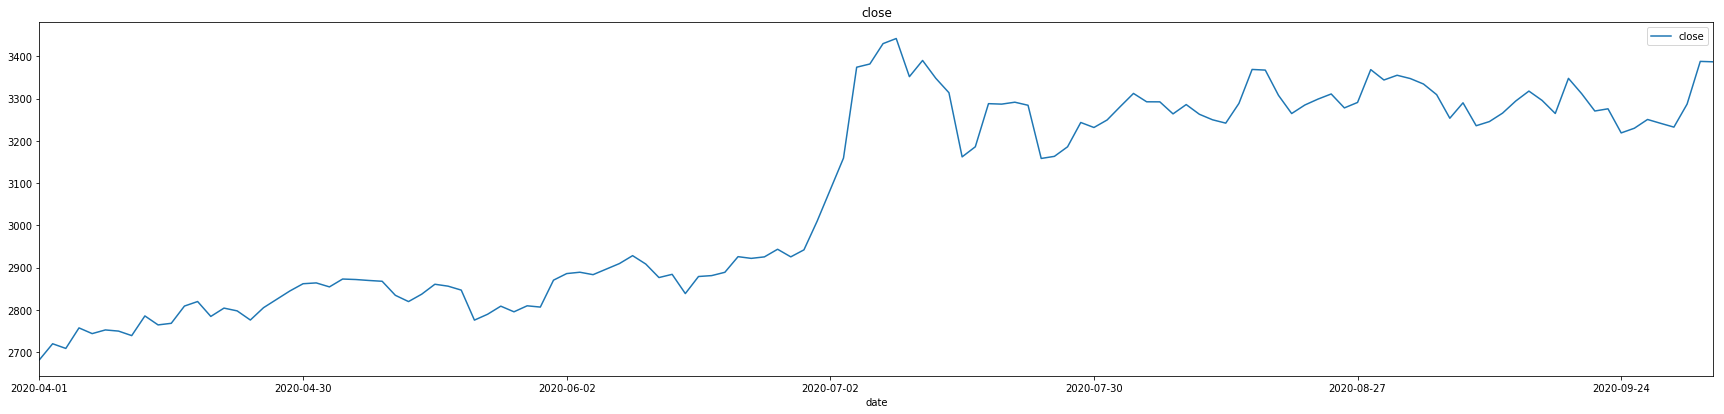

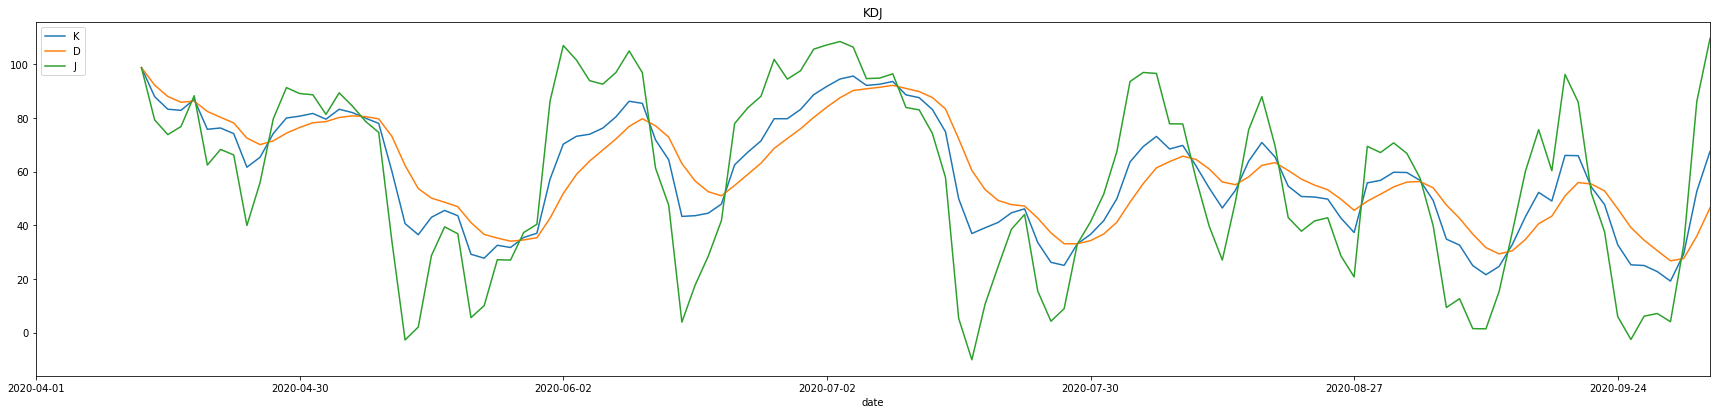

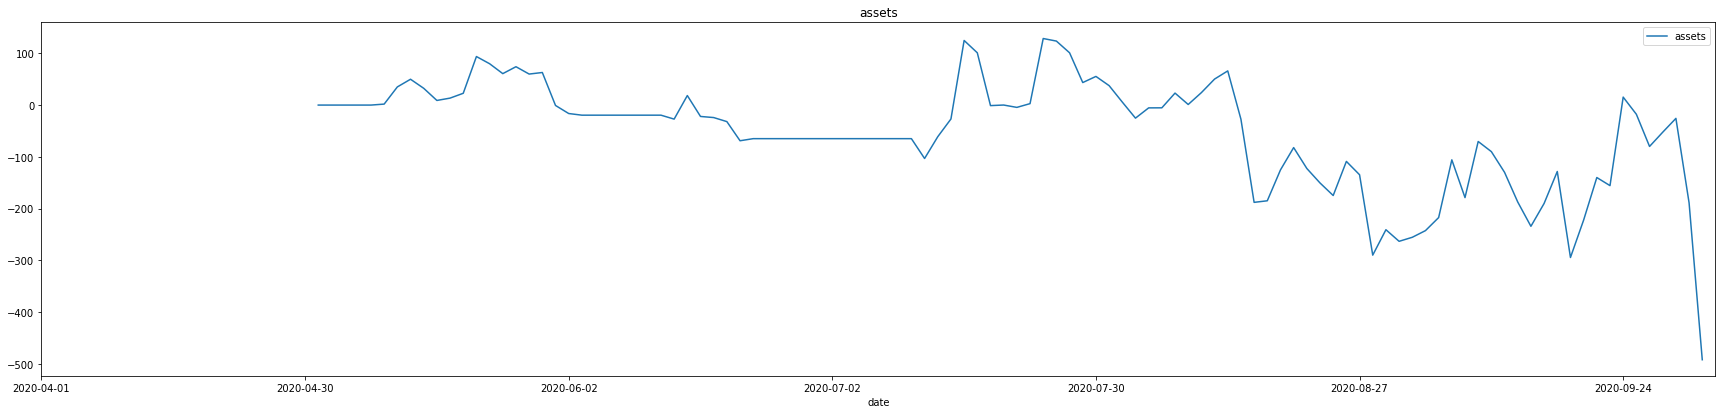

In [12]:
bs_a.plot(Indicator.KDJ_X)

### 三、查看数据

In [13]:
bs_a.k_data_plus#['udi']

,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,...,J,kdj_x,crash,share,assets,dif,dea,hist,macd_x,udi
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,sh.000016,2684.5001,2722.3249,2680.0773,2682.0795,2689.3790,2751937300,44240194623.0000,3,0.176514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-04-02,sh.000016,2667.9405,2719.8864,2665.8054,2719.8864,2682.0795,2873089300,43855142486.0000,3,0.184284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-04-03,sh.000016,2707.8191,2720.8444,2697.8315,2708.8246,2719.8864,2444455900,39428104565.0000,3,0.156790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-04-07,sh.000016,2756.2704,2762.3061,2743.1591,2757.4064,2708.8246,3595465100,59656453010.0000,3,0.230618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-04-08,sh.000016,2742.3570,2753.4930,2736.0926,2743.8865,2757.4064,2540167600,38559903637.0000,3,0.162871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-04-09,sh.000016,2754.7165,2760.5860,2749.4162,2752.5880,2743.8865,2382049700,38382876852.0000,3,0.152733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-04-10,sh.000016,2755.1967,2787.2835,2742.5231,2749.8466,2752.5880,2544479400,43526674662.0000,3,0.163115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-04-13,sh.000016,2740.0926,2749.4787,2731.0289,2739.1666,2749.8466,1918766200,30636073111.0000,3,0.123004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-04-14,sh.000016,2756.4996,2785.8013,2745.9902,2785.7200,2739.1666,2672299500,48384370745.0000,3,0.171309,...,98.712937,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [14]:
bs_a.k_data_plus.udi[bs_a.k_data_plus.macd_x>0]=1

/Users/lqshanshuo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bs_a.k_data_plus.udi[bs_a.k_data_plus.macd_x>0]=1

In [37]:
bs_a.k_data_plus

,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,...,psTTM,pcfNcfTTM,isST,dif,dea,hist,macd_x,crash,share,assets
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,sh.000016,2684.5001,2722.3249,2680.0773,2682.0795,2689.3790,2751937300,44240194623.0000,3,0.176514,...,0.000000,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,sh.000016,2667.9405,2719.8864,2665.8054,2719.8864,2682.0795,2873089300,43855142486.0000,3,0.184284,...,0.000000,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,sh.000016,2707.8191,2720.8444,2697.8315,2708.8246,2719.8864,2444455900,39428104565.0000,3,0.156790,...,0.000000,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,sh.000016,2756.2704,2762.3061,2743.1591,2757.4064,2708.8246,3595465100,59656453010.0000,3,0.230618,...,0.000000,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-08,sh.000016,2742.3570,2753.4930,2736.0926,2743.8865,2757.4064,2540167600,38559903637.0000,3,0.162871,...,0.000000,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-09,sh.000016,2754.7165,2760.5860,2749.4162,2752.5880,2743.8865,2382049700,38382876852.0000,3,0.152733,...,0.000000,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-10,sh.000016,2755.1967,2787.2835,2742.5231,2749.8466,2752.5880,2544479400,43526674662.0000,3,0.163115,...,0.000000,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-13,sh.000016,2740.0926,2749.4787,2731.0289,2739.1666,2749.8466,1918766200,30636073111.0000,3,0.123004,...,0.000000,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-14,sh.000016,2756.4996,2785.8013,2745.9902,2785.7200,2739.1666,2672299500,48384370745.0000,3,0.171309,...,0.000000,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
